In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


Using TensorFlow backend.


In [5]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/amazon.zip"
with ZipFile (file_name, 'r') as zip:
  zip.extractall()
  print("Finish")

Finish


In [6]:
# dimensions of our images.
input_shape=(150,150,3)
img_width, img_height = 150, 150

train_data_dir = '/content/amazon/training'

validation_data_dir = '/content/amazon/testing'
nb_train_samples = 329
nb_validation_samples = 26
epochs = 10
batch_size = 18

In [7]:
#rescaling data
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width,img_height),
         batch_size=8,
         class_mode='categorical')

validation_generator=datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width,img_height),
         batch_size=16,
         class_mode='categorical')


Found 300 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

In [10]:
model.compile(loss='binary_crossentropy', # or categorical_crossentropy
              optimizer='adam',# or adagrad
              metrics=['accuracy'])


In [11]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [12]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print(train_generator.class_indices)

Found 300 images belonging to 3 classes.
{'jeans': 0, 'sarees': 1, 'trousers': 2}


In [13]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 30 images belonging to 3 classes.


In [14]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/10
18/18 [==============================] - 9s 520ms/step - loss: -0.2873 - accuracy: 0.3270 - val_loss: 2.7244 - val_accuracy: 0.4444
Epoch 2/10
18/18 [==============================] - 9s 479ms/step - loss: 3.2653 - accuracy: 0.3302 - val_loss: -13.2077 - val_accuracy: 0.1667
Epoch 3/10
18/18 [==============================] - 8s 472ms/step - loss: -5.8333 - accuracy: 0.3679 - val_loss: -19.3851 - val_accuracy: 0.3333
Epoch 4/10
18/18 [==============================] - 9s 488ms/step - loss: -12.0693 - accuracy: 0.3428 - val_loss: 23.9364 - val_accuracy: 0.3333
Epoch 5/10
18/18 [==============================] - 8s 469ms/step - loss: -38.2930 - accuracy: 0.3462 - val_loss: -186.9039 - val_accuracy: 0.3333
Epoch 6/10
18/18 [==============================] - 9s 486ms/step - loss: -291.9124 - accuracy: 0.3704 - val_loss: -126.6408 - val_accuracy: 0.3333
Epoch 7/10
18/18 [==============================] - 9s 473ms/step - loss: -495.0307 - accuracy: 0.3239 - val_loss: -410.2966 - v

In [15]:
model.save('model1.h5')

In [16]:
pip install imgaug


In [17]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline

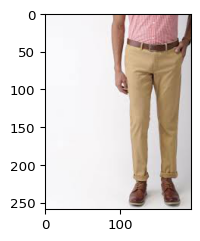

In [18]:
image = imageio.imread('/content/amazon/images/Trouser.jpg')
ia.imshow(image)

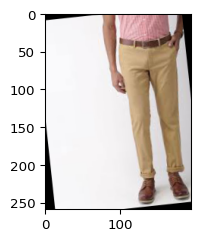

In [19]:
rotate=iaa.Affine(rotate=(-30, 30))
rotated_image=rotate.augment_image(image)
ia.imshow(rotated_image)

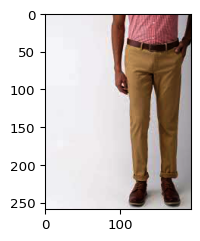

In [20]:
image = imageio.imread('/content/amazon/images/Trouser.jpg')
contrast=iaa.GammaContrast(gamma=2.0)
contrast_image =contrast.augment_image(image)
ia.imshow(contrast_image)

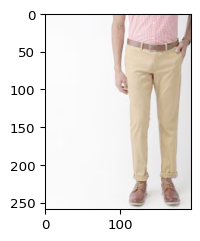

In [21]:
image = imageio.imread('/content/amazon/images/Trouser.jpg')
contrast=iaa.GammaContrast(gamma=0.5)
contrast_image =contrast.augment_image(image)
ia.imshow(contrast_image)

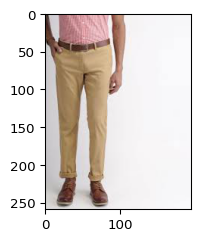

In [22]:
#flipping image horizontally
flip_hr=iaa.Fliplr(p=1.0)
flip_hr_image= flip_hr.augment_image(image)
ia.imshow(flip_hr_image)

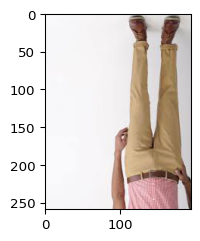

In [23]:
flip_vr=iaa.Flipud(p=1.0)
flip_vr_image= flip_vr.augment_image(image)
ia.imshow(flip_vr_image)

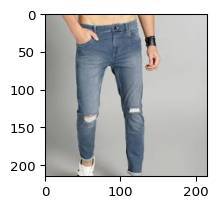

In [24]:
image = imageio.imread('/content/amazon/images/jeans.jpg')
ia.imshow(image)

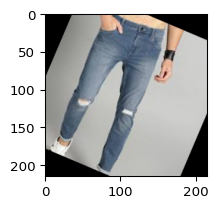

In [25]:
rotate=iaa.Affine(rotate=(-30, 30))
rotated_image=rotate.augment_image(image)
ia.imshow(rotated_image)

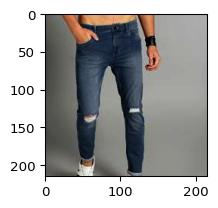

In [27]:
image = imageio.imread('/content/amazon/images/jeans.jpg')
contrast=iaa.GammaContrast(gamma=2.0)
contrast_image =contrast.augment_image(image)
ia.imshow(contrast_image)

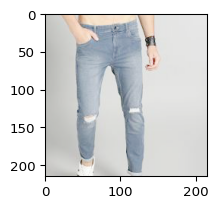

In [28]:
image = imageio.imread('/content/amazon/images/jeans.jpg')
contrast=iaa.GammaContrast(gamma=0.5)
contrast_image =contrast.augment_image(image)
ia.imshow(contrast_image)

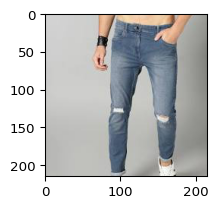

In [29]:
#flipping image horizontally
flip_hr=iaa.Fliplr(p=1.0)
flip_hr_image= flip_hr.augment_image(image)
ia.imshow(flip_hr_image)

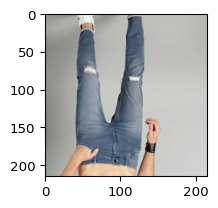

In [30]:
flip_vr=iaa.Flipud(p=1.0)
flip_vr_image= flip_vr.augment_image(image)
ia.imshow(flip_vr_image)

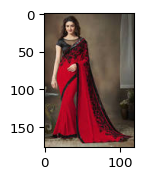

In [31]:
image = imageio.imread('/content/amazon/images/saree.jpg')
ia.imshow(image)

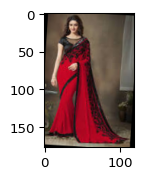

In [32]:
rotate=iaa.Affine(rotate=(-30, 30))
rotated_image=rotate.augment_image(image)
ia.imshow(rotated_image)

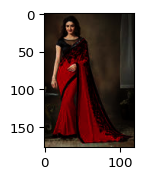

In [34]:
image = imageio.imread('/content/amazon/images/saree.jpg')
contrast=iaa.GammaContrast(gamma=2.0)
contrast_image =contrast.augment_image(image)
ia.imshow(contrast_image)

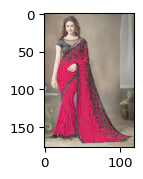

In [35]:
image = imageio.imread('/content/amazon/images/saree.jpg')
contrast=iaa.GammaContrast(gamma=0.5)
contrast_image =contrast.augment_image(image)
ia.imshow(contrast_image)

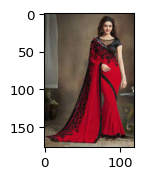

In [36]:
#flipping image horizontally
flip_hr=iaa.Fliplr(p=1.0)
flip_hr_image= flip_hr.augment_image(image)
ia.imshow(flip_hr_image)

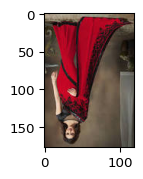

In [37]:
flip_vr=iaa.Flipud(p=1.0)
flip_vr_image= flip_vr.augment_image(image)
ia.imshow(flip_vr_image)